In [49]:
from sklearn.neighbors import NearestCentroid
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

import random
random.seed(44)
np.random.seed(44)

import sys
sys.path.append('../')
from metrics import competition_scoring, default_competition_metric

In [50]:
X_train = np.load("../../data/x_train.npy")
y_train = np.load("../../data/y_train.npy")

X_val = np.load("../../data/x_val.npy")
y_val = np.load("../../data/y_val.npy")

In [18]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


rf = pd.read_csv("final_combinations_rf.csv", index_col=False)
rf_103 = pd.read_csv("final_combinations_rf_103.csv", index_col=False)

rf = pd.concat([rf, rf_103], axis=0)

In [23]:
rf.head()

,Unnamed: 0,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_estimators,param_model__min_samples_split,param_model__min_samples_leaf,param_model__max_features,param_model__max_depth,...,param_feature_selection__columns,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,3,7.851626,0.064218,0.143090,0.002207,1600,2,4,log2,10.0,...,"[100, 102, 105]","{'model__n_estimators': 1600, 'model__min_samp...",6400.0,7025.0,7025.0,6400.0,6775.0,6725.0,280.624304,1
48,48,2.889939,0.003060,0.063253,0.000500,800,10,4,log2,10.0,...,"[100, 102, 105]","{'model__n_estimators': 800, 'model__min_sampl...",6400.0,6775.0,7025.0,6525.0,6650.0,6675.0,215.058132,2
47,47,2.851161,0.006325,0.049297,0.001005,600,10,4,sqrt,10.0,...,"[100, 102, 105]","{'model__n_estimators': 600, 'model__min_sampl...",6337.5,6900.0,7025.0,6337.5,6712.5,6662.5,283.394601,3
26,26,2.204576,0.002657,0.046025,0.000606,600,10,1,sqrt,10.0,...,"[100, 102, 105]","{'model__n_estimators': 600, 'model__min_sampl...",6212.5,6712.5,6775.0,6525.0,6775.0,6600.0,214.330352,4
62,62,1.812942,0.005991,0.048160,0.000436,400,10,4,sqrt,20.0,...,"[100, 102, 105]","{'model__n_estimators': 400, 'model__min_sampl...",6150.0,6587.5,6900.0,6275.0,6712.5,6525.0,276.699295,5


In [28]:
rf.sort_values("mean_test_score", ascending=False, inplace=True)

rf.groupby("param_feature_selection__columns")["mean_test_score"]

<Axes: >

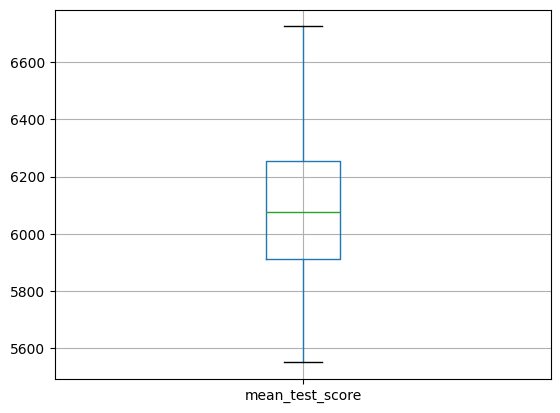

In [33]:
rf_by_columns = rf[["param_feature_selection__columns", "mean_test_score", "std_test_score"]]

Text(0.5, 0, 'Columns')

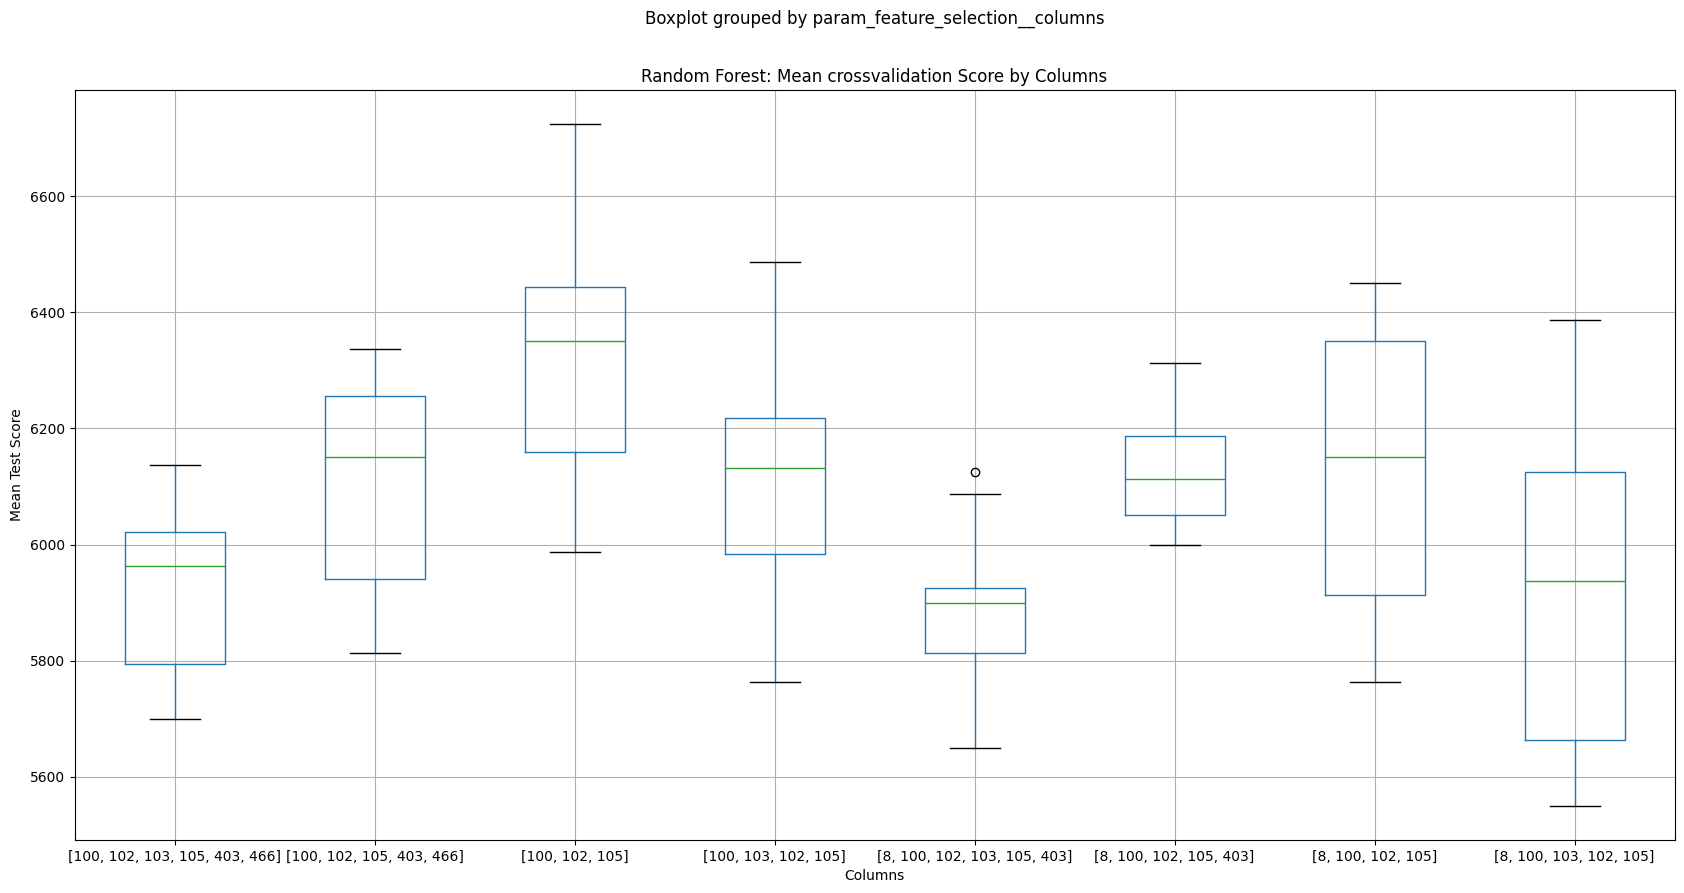

In [44]:
rf_by_columns.boxplot(column="mean_test_score", by="param_feature_selection__columns", figsize=(20, 10))

plt.title("Random Forest: Mean crossvalidation Score by Columns")
plt.ylabel("Mean Test Score")
plt.xlabel("Columns")

In [47]:
xgboost = pd.read_csv("final_combinations_xgboost.csv", index_col=False)

xgboost_103 = pd.read_csv("final_combinations_xgboost_103.csv", index_col=False)

xgboost = pd.concat([xgboost, xgboost_103], axis=0)

Text(0.5, 0, 'Columns')

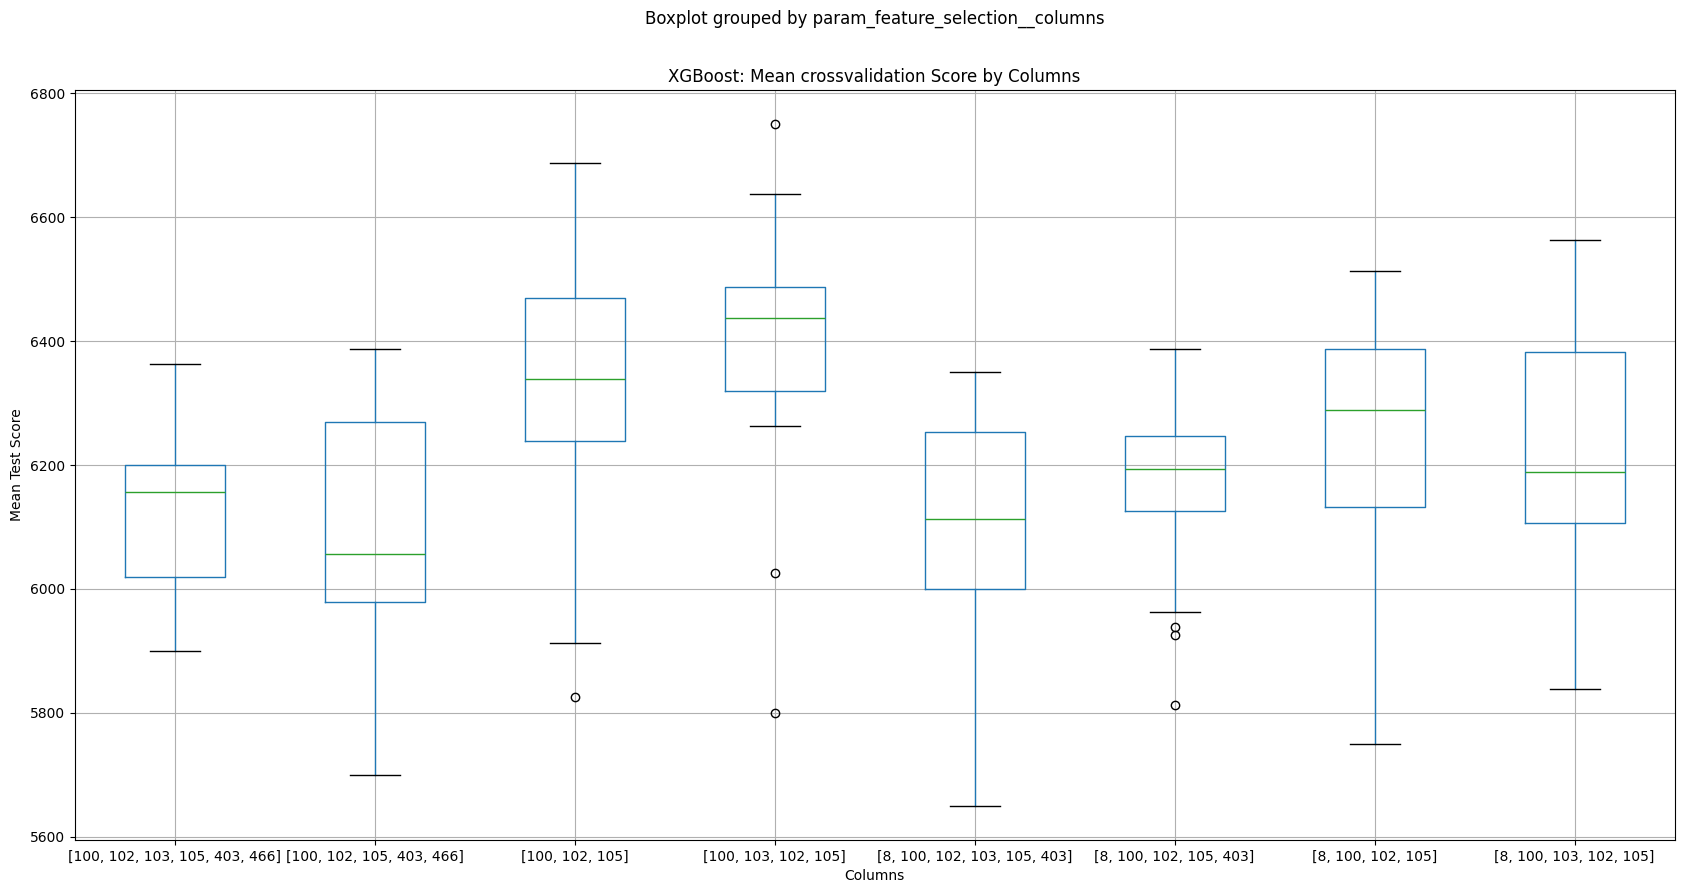

In [48]:
xgboost.sort_values("mean_test_score", ascending=False, inplace=True)

xgboost.boxplot(column="mean_test_score", by="param_feature_selection__columns", figsize=(20, 10))

plt.title("XGBoost: Mean crossvalidation Score by Columns")
plt.ylabel("Mean Test Score")
plt.xlabel("Columns")

In [137]:
svm = pd.read_csv("final_combinations_svm.csv", index_col=False)

svm_103 = pd.read_csv("final_combinations_svm_103.csv", index_col=False)

svm = pd.concat([svm, svm_103], axis=0)

Text(0.5, 0, 'Columns')

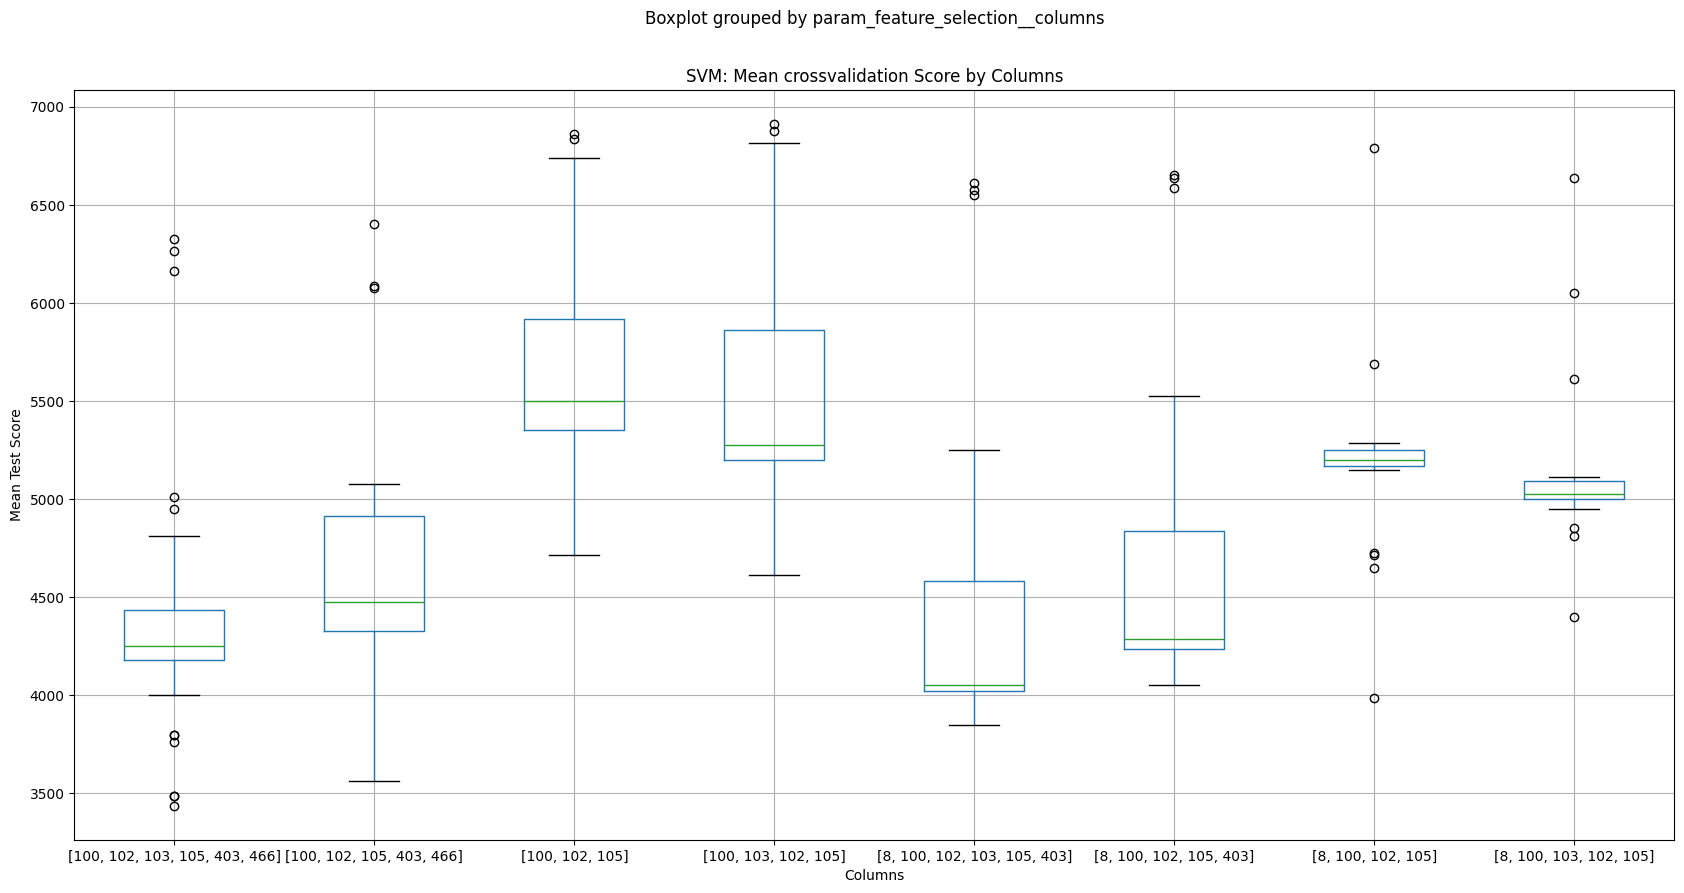

In [138]:
svm.sort_values("mean_test_score", ascending=False, inplace=True)

svm.boxplot(column="mean_test_score", by="param_feature_selection__columns", figsize=(20, 10))

plt.title("SVM: Mean crossvalidation Score by Columns")
plt.ylabel("Mean Test Score")
plt.xlabel("Columns")

In [227]:

import numpy as np
import pandas as pd
import json
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.svm import SVC

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.compose import ColumnTransformer

import sys
sys.path.append('..')

import argparse
from metrics import default_competition_metric
from metrics import make_competition_scorer, competition_scoring, ColumnSelector





X_train = np.load('../../data/x_train.npy')
y_train = np.load('../../data/y_train.npy')
X_val = np.load('../../data/x_val.npy')
y_val = np.load('../../data/y_val.npy')


base_pipe = Pipeline([
            ("feature_selection", ColumnSelector()),
            ('scaler', StandardScaler())
    ])

In [228]:
# best hyperparameters

rf_best = rf.iloc[0]
print(rf_best)
model_step =     ('model', RandomForestClassifier(n_estimators=1000, random_state=44))
pipe = Pipeline(base_pipe.steps + [model_step])


Unnamed: 0                                                                          3
mean_fit_time                                                                7.851626
std_fit_time                                                                 0.064218
mean_score_time                                                               0.14309
std_score_time                                                               0.002207
param_model__n_estimators                                                        1600
param_model__min_samples_split                                                      2
param_model__min_samples_leaf                                                       4
param_model__max_features                                                        log2
param_model__max_depth                                                           10.0
param_model__bootstrap                                                          False
param_feature_selection__columns                      

In [229]:

print("Best score: ", rf.iloc[0]["mean_test_score"])
print("Best std: ", rf.iloc[0]["std_test_score"])
best_params = rf_best["params"]


Best score:  6725.0
Best std:  280.6243040080456


In [232]:
best_params = {
    "model__n_estimators": 1600,
    "model__min_samples_split": 2,
    "model__min_samples_leaf": 4,
    "model__max_features": "log2",
    "model__max_depth": 10,
    "model__bootstrap": False,
    "feature_selection__columns": [100, 102, 105]
}
pipe.set_params(**best_params)

pipe.fit(X_train, y_train)

competition_scoring(pipe, X_val, y_val)

6650.0

In [252]:
model_step = ('model', xgb.XGBClassifier(random_state=44))

pipe = Pipeline(base_pipe.steps + [model_step])
xgboost.sort_values("mean_test_score", ascending=False, inplace=True)

print("Best score: ", xgboost.iloc[0]["mean_test_score"])
print("Best std: ", xgboost.iloc[0]["std_test_score"])
best_params = xgboost.iloc[0]["params"]
# as dictionary
best_params

Best score:  6750.0
Best std:  217.94494717703367


"{'model__n_estimators': 1000, 'model__max_depth': 3, 'model__learning_rate': 0.01, 'model__colsample_bytree': 0.75, 'feature_selection__columns': [100, 103, 102, 105]}"

In [253]:
params_dict = {
    'model__n_estimators': 1000,
    'model__max_depth': 3,
    'model__learning_rate': 0.01,
    'model__colsample_bytree': 0.75,
    'feature_selection__columns': [100, 102, 103, 105] # idk moze dodaac 103
}


pipe.set_params(**params_dict)
pipe.fit(X_train, y_train)

competition_scoring(pipe, X_val, y_val)

6450.0

In [254]:
model_step =     ('model', SVC(probability=True, random_state=44))

pipe = Pipeline(base_pipe.steps + [model_step])
svm.sort_values("mean_test_score", ascending=False, inplace=True)

print("Best score: ", svm.iloc[2]["mean_test_score"])
print("Best std: ", svm.iloc[2]["std_test_score"])
best_params = svm.iloc[2]["params"]
# as dictionary
best_params

Best score:  6862.5
Best std:  345.9588125774512


"{'model__kernel': 'rbf', 'model__gamma': 0.1, 'model__C': 1, 'feature_selection__columns': [100, 102, 105]}"

In [255]:
best_params = {
    'model__kernel': 'rbf',
    'model__gamma': 0.01,
    'model__C': 1,
    'feature_selection__columns': [100, 102, 103, 105] # idk moze dodac 103
}


pipe.set_params(**best_params)

pipe.fit(X_train, y_train)
competition_scoring(pipe, X_val, y_val)

6750.0

In [243]:
# naive bayes

from sklearn.naive_bayes import GaussianNB


nb = GaussianNB()

X_train_selected = X_train[:, [100, 102,105]]
X_val_selected = X_val[:, [100, 102,105]]

nb.fit(X_train_selected, y_train)

y_pred_proba = nb.predict_proba(X_val_selected)[:, 1]

default_competition_metric(y_val, y_pred_proba=y_pred_proba, k = 3)


6850.0

# Pretty theme

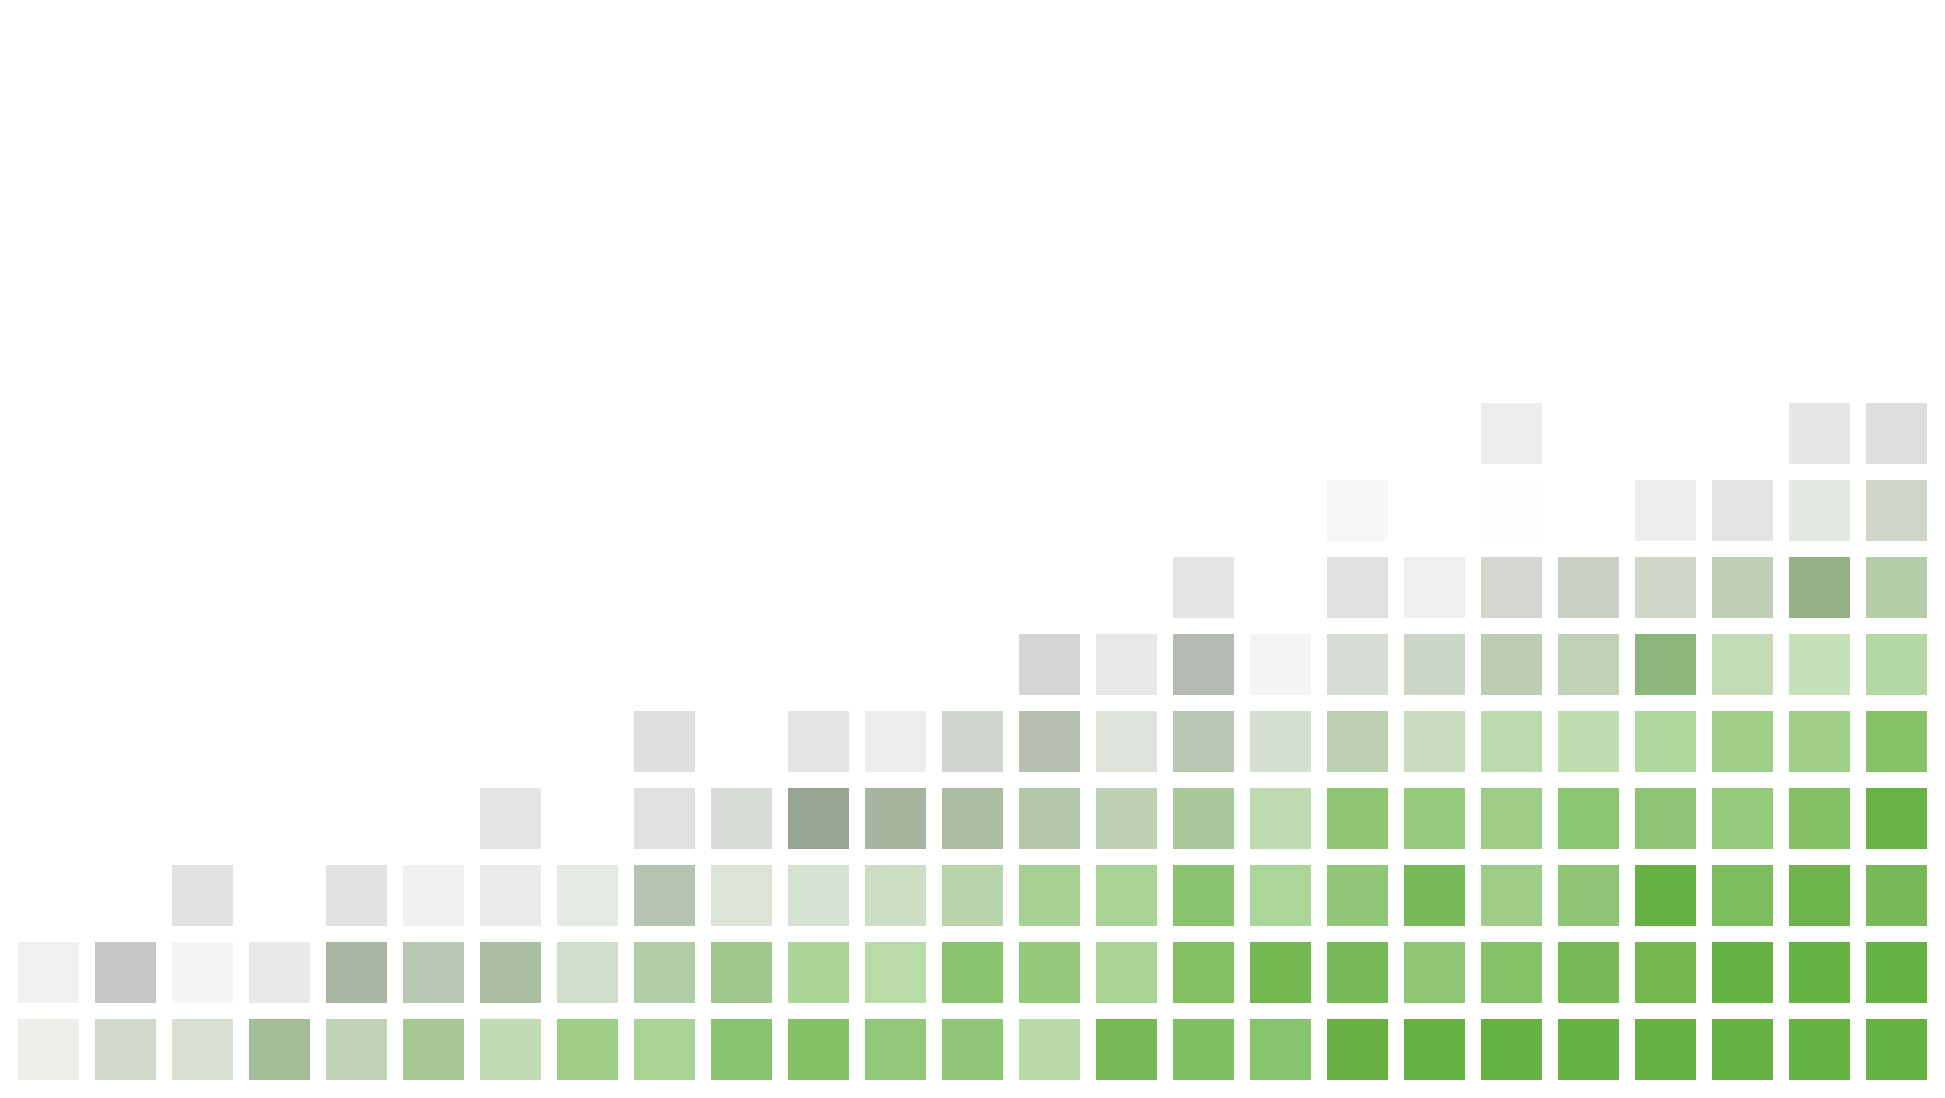

In [136]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Grid size
rows, cols = 14, 25

# Padding size
padding = 0.2
square_size = 1 - padding

# Create a figure and axis
fig, ax = plt.subplots(figsize=(cols, rows))
ax.set_xlim(0, cols)
ax.set_ylim(0, rows)
ax.set_aspect('equal')

alpha_scale = 1.5
intensity_scale = 3

# Function to calculate distance from the bottom right corner
def distance_from_bottom_right(row, col, rows, cols):
    return ((cols - col) / cols * 0.6 + (rows - row) / rows * 1.1)

# Create and color the grid of squares with padding, transparency, and intensity based on distance from bottom right
for i in range(rows):
    for j in range(cols):
        dist = distance_from_bottom_right(i, j, rows, cols)
        max_dist = distance_from_bottom_right(rows // 2, cols // 2, rows, cols) * 0.9
        intensity = 1 - (dist / max_dist)  # Intensity based on normalized distance
        alpha = min(1, max(0, alpha_scale * intensity + np.random.normal(0, 0.1)))  
        intensity = min(1, max(0, intensity_scale * intensity + np.random.normal(0, 0.01))) 
        facecolor = (intensity * 101 / 255, intensity * 177 / 255, intensity * 65 / 255, alpha)  # Green color with varying intensity
        
        
        green_intensity = max(0, random.uniform(0.5 * intensity, intensity))  # Random green intensity proportional to distance
        square = plt.Rectangle(
            (j + padding / 2, rows-1-i + padding / 2), 
            square_size, 
            square_size, 
            #edgecolor=(0, 0, 0, alpha),  # Black border with transparency
            facecolor=facecolor  # Green fill with varying intensity and transparency
        )
        
        ax.add_patch(square)

# Remove axis
ax.axis('off')

# Show the plot
plt.show()
